In [1]:
!python -V

Python 3.9.12


In [2]:
!pip install pandas seaborn scikit-learn requests pyarrow fastparquet

In [3]:
import pandas as pd

/home/codespace/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/codespace/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [4]:
import pickle

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [16]:
#import sys

#sys.path.append("../o1-intro")  # adjust path if needed

#from nyc_green_taxi_loader import NYCGreenTaxiLoader

#loader = NYCGreenTaxiLoader(
#        years=(2023, 2024),  # Download data for 2023 and 2024
#        start_month=1,       # Starting from January
#        end_month=12         # Until December
#    )
#    
#loader.run(max_workers=4)  # Adjust the number of parallel workers based on your system

2025-05-02 16:32:59,107 - INFO - Starting NYC Green Taxi data pipeline at 2025-05-02 16:32:59.107307
2025-05-02 16:32:59,115 - INFO - Processing 24 files
2025-05-02 16:32:59,116 - INFO - File already exists: green_taxi_data/raw/green_taxi_2023_01.parquet
2025-05-02 16:32:59,119 - INFO - File already exists: green_taxi_data/raw/green_taxi_2023_02.parquet
2025-05-02 16:32:59,120 - INFO - File already exists: green_taxi_data/raw/green_taxi_2023_04.parquet
2025-05-02 16:32:59,120 - INFO - File already exists: green_taxi_data/raw/green_taxi_2023_03.parquet
2025-05-02 16:32:59,121 - INFO - File already exists: green_taxi_data/raw/green_taxi_2023_05.parquet
2025-05-02 16:32:59,122 - INFO - File already exists: green_taxi_data/raw/green_taxi_2023_06.parquet
2025-05-02 16:32:59,122 - INFO - File already exists: green_taxi_data/raw/green_taxi_2023_07.parquet
2025-05-02 16:32:59,122 - INFO - File already exists: green_taxi_data/raw/green_taxi_2023_08.parquet
2025-05-02 16:32:59,124 - INFO - File 

2025-05-02 16:32:59,969 - INFO - Updated monthly summary for 2024-08
2025-05-02 16:32:59,974 - INFO - Processing: green_taxi_data/raw/green_taxi_2024_12.parquet
2025-05-02 16:33:00,028 - INFO - Saved processed data: green_taxi_data/processed/green_taxi_2024_09.parquet
2025-05-02 16:33:00,036 - INFO - Updated monthly summary for 2024-09
2025-05-02 16:33:00,054 - INFO - Saved processed data: green_taxi_data/processed/green_taxi_2024_10.parquet
2025-05-02 16:33:00,059 - INFO - Saved processed data: green_taxi_data/processed/green_taxi_2024_12.parquet
2025-05-02 16:33:00,067 - INFO - Saved processed data: green_taxi_data/processed/green_taxi_2024_11.parquet
2025-05-02 16:33:00,067 - INFO - Updated monthly summary for 2024-10
2025-05-02 16:33:00,075 - INFO - Updated monthly summary for 2024-12
2025-05-02 16:33:00,081 - INFO - Updated monthly summary for 2024-11
2025-05-02 16:33:00,082 - INFO - Creating combined dataset...
2025-05-02 16:33:01,490 - INFO - Created combined dataset with 1,447,

In [9]:
df_jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-01.parquet')
df_jan.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-01-01 00:03:01,2025-01-01 00:17:12,N,1.0,75,235,1.0,5.93,24.70,...,0.5,6.80,0.00,NaN,1.0,34.00,1.0,1.0,0.00,0.0
1,2,2025-01-01 00:19:59,2025-01-01 00:25:52,N,1.0,166,75,1.0,1.32,8.60,...,0.5,0.00,0.00,NaN,1.0,11.10,2.0,1.0,0.00,0.0
2,2,2025-01-01 00:05:29,2025-01-01 00:07:21,N,5.0,171,73,1.0,0.41,25.55,...,0.0,0.00,0.00,NaN,1.0,26.55,2.0,2.0,0.00,0.0
3,2,2025-01-01 00:52:24,2025-01-01 01:07:52,N,1.0,74,223,1.0,4.12,21.20,...,0.5,6.13,6.94,NaN,1.0,36.77,1.0,1.0,0.00,0.0
4,2,2025-01-01 00:25:05,2025-01-01 01:01:10,N,1.0,66,158,1.0,4.71,33.80,...,0.5,7.81,0.00,NaN,1.0,46.86,1.0,1.0,2.75,0.0


In [15]:
df_jan.dtypes

VendorID                          int32
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
cbd_congestion_fee              float64
dtype: object

In [10]:
df_feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-02.parquet')
df_feb.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-02-01 00:12:15,2025-02-01 00:15:48,N,1.0,166,41,1.0,0.65,6.5,...,0.5,1.80,0.0,NaN,1.0,10.80,1.0,1.0,0.00,0.00
1,2,2025-01-31 23:57:05,2025-02-01 00:24:24,N,1.0,255,161,1.0,6.57,31.7,...,0.5,0.00,0.0,NaN,1.0,37.70,2.0,1.0,2.75,0.75
2,2,2025-02-01 00:24:26,2025-02-01 00:49:54,N,1.0,75,182,2.0,8.36,36.6,...,0.5,0.00,0.0,NaN,1.0,39.10,2.0,1.0,0.00,0.00
3,1,2025-02-01 00:17:15,2025-02-01 00:25:56,N,1.0,97,209,1.0,2.40,12.8,...,1.5,3.75,0.0,NaN,1.0,22.55,1.0,1.0,2.75,0.75
4,2,2025-02-01 00:17:36,2025-02-01 00:26:36,N,1.0,7,223,1.0,1.31,10.7,...,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,0.00


In [14]:
df_feb.dtypes

VendorID                          int32
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
cbd_congestion_fee              float64
dtype: object

In [17]:
# Assuming df_jan and df_feb are your DataFrames
df = pd.concat([df_jan, df_feb], axis=0)

# Reset the index if needed
df.reset_index(drop=True, inplace=True)

# Display the first few rows of the merged DataFrame
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-01-01 00:03:01,2025-01-01 00:17:12,N,1.0,75,235,1.0,5.93,24.70,...,0.5,6.80,0.00,NaN,1.0,34.00,1.0,1.0,0.00,0.0
1,2,2025-01-01 00:19:59,2025-01-01 00:25:52,N,1.0,166,75,1.0,1.32,8.60,...,0.5,0.00,0.00,NaN,1.0,11.10,2.0,1.0,0.00,0.0
2,2,2025-01-01 00:05:29,2025-01-01 00:07:21,N,5.0,171,73,1.0,0.41,25.55,...,0.0,0.00,0.00,NaN,1.0,26.55,2.0,2.0,0.00,0.0
3,2,2025-01-01 00:52:24,2025-01-01 01:07:52,N,1.0,74,223,1.0,4.12,21.20,...,0.5,6.13,6.94,NaN,1.0,36.77,1.0,1.0,0.00,0.0
4,2,2025-01-01 00:25:05,2025-01-01 01:01:10,N,1.0,66,158,1.0,4.71,33.80,...,0.5,7.81,0.00,NaN,1.0,46.86,1.0,1.0,2.75,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94947 entries, 0 to 94946
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               94947 non-null  int32         
 1   lpep_pickup_datetime   94947 non-null  datetime64[us]
 2   lpep_dropoff_datetime  94947 non-null  datetime64[us]
 3   store_and_fwd_flag     90594 non-null  object        
 4   RatecodeID             90594 non-null  float64       
 5   PULocationID           94947 non-null  int32         
 6   DOLocationID           94947 non-null  int32         
 7   passenger_count        90594 non-null  float64       
 8   trip_distance          94947 non-null  float64       
 9   fare_amount            94947 non-null  float64       
 10  extra                  94947 non-null  float64       
 11  mta_tax                94947 non-null  float64       
 12  tip_amount             94947 non-null  float64       
 13  t

In [19]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,94947.0,1.901408,1.0,2.0,2.0,2.0,6.0,0.492803
lpep_pickup_datetime,94947,2025-01-31 11:07:49.722350,2024-12-25 23:13:15,2025-01-16 17:08:51,2025-01-31 16:08:39,2025-02-14 15:49:46,2025-03-01 23:29:24,NaN
lpep_dropoff_datetime,94947,2025-01-31 11:27:59.360401,2024-12-25 23:13:17,2025-01-16 17:24:45.500000,2025-01-31 16:27:47,2025-02-14 16:12:18.500000,2025-03-01 23:36:36,NaN
RatecodeID,90594.0,1.190134,1.0,1.0,1.0,1.0,99.0,1.56252
PULocationID,94947.0,94.710797,3.0,74.0,75.0,97.0,265.0,55.291004
DOLocationID,94947.0,142.02989,1.0,74.0,140.0,230.0,265.0,77.274286
passenger_count,90594.0,1.27993,0.0,1.0,1.0,1.0,9.0,0.93395
trip_distance,94947.0,18.442782,0.0,1.1,1.76,3.0,111597.19,939.410655
fare_amount,94947.0,16.723886,-113.0,9.3,13.5,19.1,633.7,13.498695
extra,94947.0,0.922567,-5.0,0.0,0.0,2.5,12.5,1.355332


In [20]:
df.describe(include=['object', 'category'])

,store_and_fwd_flag
count,90594
unique,2
top,N
freq,90341


In [21]:
#1. Initial Data Quality Assessment
print("Initial Data Shape:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False))

# Drop completely empty column
df.drop(columns=['ehail_fee'], inplace=True)

Initial Data Shape: (94947, 21)

Missing Values:
ehail_fee                94947
trip_type                 4370
congestion_surcharge      4353
store_and_fwd_flag        4353
RatecodeID                4353
payment_type              4353
passenger_count           4353
cbd_congestion_fee        3824
tip_amount                   0
total_amount                 0
improvement_surcharge        0
tolls_amount                 0
VendorID                     0
mta_tax                      0
lpep_pickup_datetime         0
fare_amount                  0
trip_distance                0
DOLocationID                 0
PULocationID                 0
lpep_dropoff_datetime        0
extra                        0
dtype: int64


In [22]:
# Select rows where all 6 fields are null
null_block = df[df[['trip_type', 'congestion_surcharge', 'passenger_count',
                    'RatecodeID', 'store_and_fwd_flag', 'payment_type']].isnull().all(axis=1)]

print("Rows with all 6 key fields null:", null_block.shape[0])
null_block.describe(include='all')

Rows with all 6 key fields null: 4353


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
count,4353.000000,4353,4353,0,0.0,4353.000000,4353.000000,0.0,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,0.0,0.0,0.0,529.000000
unique,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.625775,2025-02-03 06:06:05.883298,2025-02-03 06:26:26.515047,NaN,NaN,112.189065,137.906272,NaN,330.735748,20.902288,0.045371,0.498047,2.830604,0.641355,0.881806,30.154565,NaN,NaN,NaN,0.089319
min,1.000000,2025-01-01 00:18:00,2025-01-01 00:32:00,NaN,NaN,3.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,NaN,NaN,NaN,0.000000
25%,2.000000,2025-01-19 23:17:00,2025-01-19 23:42:00,NaN,NaN,42.000000,75.000000,NaN,1.400000,12.080000,0.000000,0.500000,0.000000,0.000000,1.000000,17.230000,NaN,NaN,NaN,0.000000
50%,2.000000,2025-02-05 15:20:00,2025-02-05 16:02:06,NaN,NaN,76.000000,141.000000,NaN,2.900000,16.540000,0.000000,0.500000,2.100000,0.000000,1.000000,24.100000,NaN,NaN,NaN,0.000000
75%,2.000000,2025-02-17 10:08:00,2025-02-17 10:51:00,NaN,NaN,183.000000,193.000000,NaN,6.520000,28.650000,0.000000,0.500000,4.230000,0.000000,1.000000,39.410000,NaN,NaN,NaN,0.000000
max,6.000000,2025-02-28 23:52:00,2025-03-01 00:05:00,NaN,NaN,265.000000,265.000000,NaN,111597.190000,138.620000,7.500000,0.500000,22.910000,21.500000,1.000000,147.060000,NaN,NaN,NaN,0.750000


In [23]:
complete_rows = df.dropna(subset=['trip_type', 'congestion_surcharge', 'passenger_count',
                                  'RatecodeID', 'store_and_fwd_flag', 'payment_type'])

# Compare distributions, for example:
print("Avg fare (null rows):", null_block['fare_amount'].mean())
print("Avg fare (complete rows):", complete_rows['fare_amount'].mean())

Avg fare (null rows): 20.902288077188146
Avg fare (complete rows): 16.5218215441006


In [24]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')
df['payment_type'] = df['payment_type'].fillna(-1)
df['RatecodeID'] = df['RatecodeID'].fillna(-1)
df['trip_type'] = df['trip_type'].fillna(-1)
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)

In [25]:
#1. Initial Data Quality Assessment
print("Initial Data Shape:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False))

Initial Data Shape: (94947, 20)

Missing Values:
cbd_congestion_fee       3824
lpep_pickup_datetime        0
congestion_surcharge        0
trip_type                   0
payment_type                0
total_amount                0
improvement_surcharge       0
tolls_amount                0
tip_amount                  0
mta_tax                     0
VendorID                    0
fare_amount                 0
trip_distance               0
passenger_count             0
DOLocationID                0
PULocationID                0
RatecodeID                  0
store_and_fwd_flag          0
lpep_dropoff_datetime       0
extra                       0
dtype: int64


In [26]:
#2. Temporal Data Validation

# Check date ranges more carefully
print("\nDate Ranges:")
print("Pickup min:", df['lpep_pickup_datetime'].min())
print("Pickup max:", df['lpep_pickup_datetime'].max())
print("Dropoff min:", df['lpep_dropoff_datetime'].min())
print("Dropoff max:", df['lpep_dropoff_datetime'].max())

# Filter to reasonable date range (2023-2024)
df = df[(df['lpep_pickup_datetime'].dt.year >= 2023) & 
        (df['lpep_pickup_datetime'].dt.year <= 2024)]


Date Ranges:
Pickup min: 2024-12-25 23:13:15
Pickup max: 2025-03-01 23:29:24
Dropoff min: 2024-12-25 23:13:17
Dropoff max: 2025-03-01 23:36:36


In [27]:
# Step 1: Define financial columns
financial_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 
                  'tolls_amount', 'improvement_surcharge', 'total_amount',
                  'congestion_surcharge']

print("\nFinancial Columns Summary (Before Cleaning):")
print(df[financial_cols].describe())

# Step 2: Analyze negatives, flag them, and replace with 0
for col in financial_cols:
    neg_mask = df[col] < 0
    neg_count = neg_mask.sum()
    
    if neg_count > 0:
        print(f"\nColumn {col} has {neg_count} negative values:")
        print(df.loc[neg_mask, col].describe())
        
        # Add flag column to indicate refund
        df[f'{col}_was_refund'] = neg_mask
        
        # Replace negative values with 0
        df.loc[neg_mask, col] = 0
    else:
        # If no negatives, still add a column for consistency (all False)
        df[f'{col}_was_refund'] = False


Financial Columns Summary (Before Cleaning):
       fare_amount     extra   mta_tax  tip_amount  tolls_amount  \
count     6.000000  6.000000  6.000000     6.00000      6.000000   
mean     24.216667  0.666667  0.250000     2.28000      1.156667   
std      22.936121  0.516398  0.273861     2.66254      2.833243   
min       5.800000  0.000000  0.000000     0.00000      0.000000   
25%       8.075000  0.250000  0.000000     0.37500      0.000000   
50%      15.800000  1.000000  0.250000     1.86000      0.000000   
75%      32.000000  1.000000  0.500000     2.62500      0.000000   
max      65.000000  1.000000  0.500000     7.20000      6.940000   

       improvement_surcharge  total_amount  congestion_surcharge  
count                    6.0      6.000000              6.000000  
mean                     1.0     30.028333              0.458333  
std                      0.0     24.128934              1.122683  
min                      1.0     11.900000              0.000000  
25%   

In [28]:
#2. Temporal Data Validation

# Check date ranges more carefully
print("\nDate Ranges:")
print("Pickup min:", df['lpep_pickup_datetime'].min())
print("Pickup max:", df['lpep_pickup_datetime'].max())
print("Dropoff min:", df['lpep_dropoff_datetime'].min())
print("Dropoff max:", df['lpep_dropoff_datetime'].max())

# Filter to reasonable date range (2023-2024)
df = df[(df['lpep_pickup_datetime'].dt.year >= 2023) & 
        (df['lpep_pickup_datetime'].dt.year <= 2024)]


Date Ranges:
Pickup min: 2024-12-25 23:13:15
Pickup max: 2024-12-31 23:30:28
Dropoff min: 2024-12-25 23:13:17
Dropoff max: 2024-12-31 23:35:39


In [29]:
# 3. Financial Columns Analysis (Better Approach)

financial_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 
                  'tolls_amount', 'improvement_surcharge', 'total_amount',
                  'congestion_surcharge']

print("\nFinancial Columns Summary (Before Cleaning):")
print(df[financial_cols].describe())

# Step 2: Analyze negatives, flag them, and replace with 0
for col in financial_cols:
    neg_mask = df[col] < 0
    neg_count = neg_mask.sum()
    
    if neg_count > 0:
        print(f"\nColumn {col} has {neg_count} negative values:")
        print(df.loc[neg_mask, col].describe())
        
        # Add flag column to indicate refund
        df[f'{col}_was_refund'] = neg_mask
        
        # Replace negative values with 0
        df.loc[neg_mask, col] = 0
    else:
        # If no negatives, still add a column for consistency (all False)
        df[f'{col}_was_refund'] = False


Financial Columns Summary (Before Cleaning):
       fare_amount     extra   mta_tax  tip_amount  tolls_amount  \
count     6.000000  6.000000  6.000000     6.00000      6.000000   
mean     24.216667  0.666667  0.250000     2.28000      1.156667   
std      22.936121  0.516398  0.273861     2.66254      2.833243   
min       5.800000  0.000000  0.000000     0.00000      0.000000   
25%       8.075000  0.250000  0.000000     0.37500      0.000000   
50%      15.800000  1.000000  0.250000     1.86000      0.000000   
75%      32.000000  1.000000  0.500000     2.62500      0.000000   
max      65.000000  1.000000  0.500000     7.20000      6.940000   

       improvement_surcharge  total_amount  congestion_surcharge  
count                    6.0      6.000000              6.000000  
mean                     1.0     30.028333              0.458333  
std                      0.0     24.128934              1.122683  
min                      1.0     11.900000              0.000000  
25%   


Trip Distance Distribution:
count     6.000000
mean      2.151667
std       3.943736
min       0.000000
25%       0.210000
50%       0.830000
75%       1.030000
max      10.150000
Name: trip_distance, dtype: float64


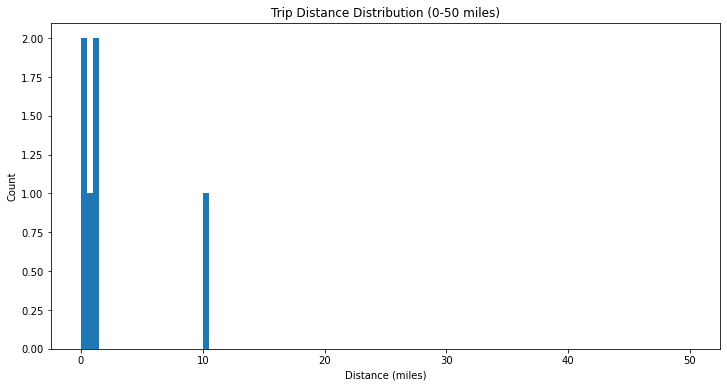


99th percentile of trip distance: 9.694500000000001


In [30]:
#4. Trip Distance Analysis (Better Approach)
import numpy as np 

print("\nTrip Distance Distribution:")
print(df['trip_distance'].describe())

# Visualize distribution
plt.figure(figsize=(12,6))
plt.hist(df['trip_distance'], bins=100, range=(0, 50))
plt.title('Trip Distance Distribution (0-50 miles)')
plt.xlabel('Distance (miles)')
plt.ylabel('Count')
plt.show()

# Instead of hard capping, consider:
# 1. Winsorizing (capping at 99th percentile)
# 2. Natural log transformation
# 3. Separate analysis for short/long trips

# Example: Winsorization
upper_limit = df['trip_distance'].quantile(0.99)
print(f"\n99th percentile of trip distance: {upper_limit}")
df['trip_distance'] = np.where(df['trip_distance'] > upper_limit, upper_limit, df['trip_distance'])

In [31]:
#5. RatecodeID Cleaning (With Explanation)

# Standard RatecodeIDs:
# 1 = Standard rate
# 2 = JFK
# 3 = Newark
# 4 = Nassau or Westchester
# 5 = Negotiated fare
# 6 = Group ride

print("\nOriginal RatecodeID Distribution:")
print(df['RatecodeID'].value_counts(dropna=False))

# Instead of hard-coding, we could:
# 1. Keep valid codes (1-6)
# 2. Create "other" category for invalid codes
# 3. Or treat 99 as negotiated fare (common in some datasets)

valid_ratecodes = [1, 2, 3, 4, 5, 6]
df['RatecodeID'] = np.where(df['RatecodeID'].isin(valid_ratecodes), 
                           df['RatecodeID'], 
                           np.nan)  # or could use 1 for standard rate

print("\nCleaned RatecodeID Distribution:")
print(df['RatecodeID'].value_counts(dropna=False))


Original RatecodeID Distribution:
RatecodeID
1.0    3
5.0    2
3.0    1
Name: count, dtype: int64

Cleaned RatecodeID Distribution:
RatecodeID
1.0    3
5.0    2
3.0    1
Name: count, dtype: int64



Trip Duration Analysis:
count     6.000000
mean      5.597222
std       6.448423
min       0.033333
25%       1.050000
50%       4.241667
75%       6.783333
max      17.450000
Name: trip_duration, dtype: float64


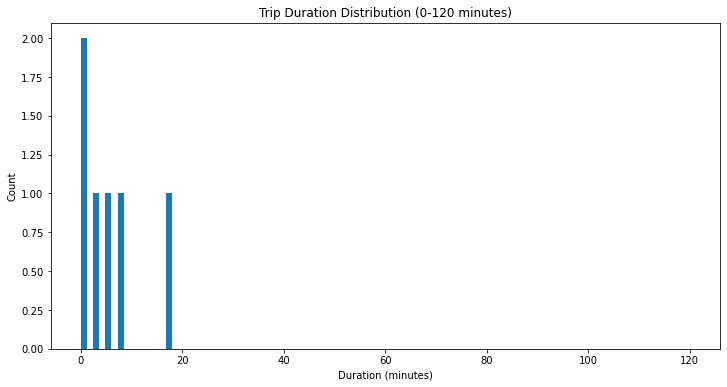

In [32]:
# 6. Temporal Patterns Analysis

# Extract temporal features
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['lpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['lpep_pickup_datetime'].dt.month
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds()/60

# Analyze trip duration
print("\nTrip Duration Analysis:")
print(df['trip_duration'].describe())

# Plot duration distribution
plt.figure(figsize=(12,6))
plt.hist(df['trip_duration'], bins=100, range=(0, 120))
plt.title('Trip Duration Distribution (0-120 minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

In [33]:
# 7. Location Analysis

print("\nTop 10 Pickup Locations:")
print(df['PULocationID'].value_counts().head(10))

print("\nTop 10 Dropoff Locations:")
print(df['DOLocationID'].value_counts().head(10))

# Analyze common routes
df['route'] = df['PULocationID'].astype(str) + '-' + df['DOLocationID'].astype(str)
print("\nTop 10 Common Routes:")
print(df['route'].value_counts().head(10))


Top 10 Pickup Locations:
PULocationID
75    2
74    1
82    1
7     1
92    1
Name: count, dtype: int64

Top 10 Dropoff Locations:
DOLocationID
74     1
236    1
151    1
129    1
264    1
75     1
Name: count, dtype: int64

Top 10 Common Routes:
route
74-74     1
75-236    1
75-151    1
82-129    1
7-264     1
92-75     1
Name: count, dtype: int64


In [34]:
#8. Passenger Count Analysis
print("\nPassenger Count Distribution:")
print(df['passenger_count'].value_counts(dropna=False))

# Clean passenger counts - don't just cap at 6
# Consider that 0 might mean unknown rather than no passengers
df['passenger_count'] = df['passenger_count'].fillna(0)
df['passenger_count'] = np.where(df['passenger_count'] > 8, 1, df['passenger_count'])


Passenger Count Distribution:
passenger_count
1.0    4
3.0    1
6.0    1
Name: count, dtype: int64


In [35]:
# 9. Vendor and Payment Analysis

print("\nVendor Distribution:")
print(df['VendorID'].value_counts(dropna=False))

print("\nPayment Type Distribution:")
# 1= Credit card
# 2= Cash
# 3= No charge
# 4= Dispute
# 5= Unknown
print(df['payment_type'].value_counts(dropna=False))

# Analyze tip behavior by payment type
if 'payment_type' in df.columns:
    print("\nTip Amount by Payment Type:")
    print(df.groupby('payment_type')['tip_amount'].describe())


Vendor Distribution:
VendorID
2    6
Name: count, dtype: int64

Payment Type Distribution:
payment_type
1.0    4
2.0    2
Name: count, dtype: int64

Tip Amount by Payment Type:
              count  mean       std  min   25%   50%   75%  max
payment_type                                                   
1.0             4.0  3.42  2.572314  1.5  2.04  2.49  3.87  7.2
2.0             2.0  0.00  0.000000  0.0  0.00  0.00  0.00  0.0


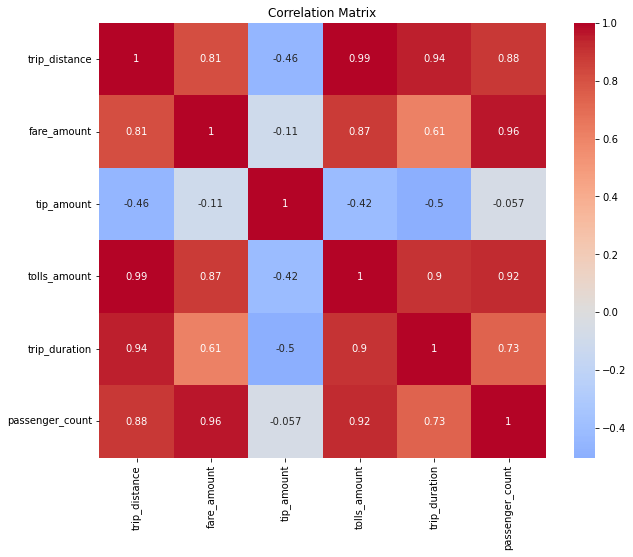

In [36]:
# 10. Correlation Analysis

# Select key numerical features
numerical_features = ['trip_distance', 'fare_amount', 'tip_amount', 
                     'tolls_amount', 'trip_duration', 'passenger_count']

# Calculate correlations
corr_matrix = df[numerical_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [38]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount_was_refund,tolls_amount_was_refund,improvement_surcharge_was_refund,total_amount_was_refund,congestion_surcharge_was_refund,pickup_hour,pickup_dayofweek,pickup_month,trip_duration,route
9,2,2024-12-31 22:42:13,2024-12-31 22:42:31,N,3.0,74,74,1.0,0.06,23.0,...,False,False,False,False,False,22,1,12,0.300000,74-74
10,2,2024-12-31 23:01:11,2024-12-31 23:04:29,N,1.0,75,236,1.0,0.66,5.8,...,False,False,False,False,False,23,1,12,3.300000,75-236
73,2,2024-12-31 23:30:28,2024-12-31 23:35:39,N,1.0,75,151,1.0,1.04,7.9,...,False,False,False,False,False,23,1,12,5.183333,75-151
251,2,2024-12-31 19:56:14,2024-12-31 20:03:33,N,1.0,82,129,1.0,1.00,8.6,...,False,False,False,False,False,19,1,12,7.316667,82-129
320,2,2024-12-25 23:13:15,2024-12-25 23:13:17,N,5.0,7,264,3.0,0.00,35.0,...,False,False,False,False,False,23,2,12,0.033333,7-264


In [41]:
!pip install xgboost

     |████████████████████████████████| 223.6 MB 4.0 kB/s s eta 0:00:01  |█▍                              | 9.9 MB 32.2 MB/s eta 0:00:07     |████▋                           | 32.1 MB 32.2 MB/s eta 0:00:06     |██████████████████████████▎     | 183.8 MB 104.7 MB/s eta 0:00:01
     |██████████████████████████████  | 272.5 MB 99.0 MB/s eta 0:00:011��███████               | 154.6 MB 108.4 MB/s eta 0:00:02[K     |██████████████████              | 164.1 MB 108.4 MB/s eta 0:00:02��███████████████████▋           | 188.3 MB 108.4 MB/s eta 0:00:01��██▏     | 238.6 MB 99.0 MB/s eta 0:00:01��██████████████    | 255.0 MB 99.0 MB/s eta 0:00:01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 291.7 MB 16 kB/s 


In [42]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# ------------------------------
# 1. Feature Selection
# ------------------------------
categorical = ['PULocationID', 'DOLocationID', 'route', 'pickup_hour', 'pickup_dayofweek']
numerical = ['trip_distance', 'passenger_count', 'fare_amount']
target = 'trip_duration'

# ------------------------------
# 2. Train-Test Split
# ------------------------------
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=42)

# ------------------------------
# 3. DictVectorizer
# ------------------------------
dv = DictVectorizer()

def preprocess(df_):
    df_ = df_.copy()
    df_ = df_[categorical + numerical]
    return dv.transform(df_.to_dict(orient='records'))

# Fit on training set
dv.fit(df_train[categorical + numerical].to_dict(orient='records'))

X_train = preprocess(df_train)
y_train = df_train[target].values

X_val = preprocess(df_val)
y_val = df_val[target].values

X_test = preprocess(df_test)
y_test = df_test[target].values

# ------------------------------
# 4.1 Model Training
# ------------------------------
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Random Forest RMSE: {rmse:.2f} minutes")
print(f"Random Forest MAE: {mae:.2f} minutes")

# ------------------------------
# 4.2 Linear Regression
# ------------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.2f} minutes")
print(f"Linear Regression MAE: {mae_lr:.2f} minutes")

# ------------------------------
# 4.3 XGBoost
# ------------------------------
xgb = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f} minutes")
print(f"XGBoost MAE: {mae_xgb:.2f} minutes")

# ------------------------------
# 5.3 Final Comparison Table
# ------------------------------
print("\nModel Comparison:")
print(f"{'Model':<20} {'RMSE':<10} {'MAE':<10}")
print(f"{'Random Forest':<20} {rmse:.2f}     {mae:.2f}")
print(f"{'Linear Regression':<20} {rmse_lr:.2f}     {mae_lr:.2f}")
print(f"{'XGBoost':<20} {rmse_xgb:.2f}     {mae_xgb:.2f}")


Random Forest RMSE: 6.61 minutes
Random Forest MAE: 6.43 minutes
Linear Regression RMSE: 9.00 minutes
Linear Regression MAE: 8.00 minutes
XGBoost RMSE: 11.75 minutes
XGBoost MAE: 9.93 minutes

Model Comparison:
Model                RMSE       MAE       
Random Forest        6.61     6.43
Linear Regression    9.00     8.00
XGBoost              11.75     9.93


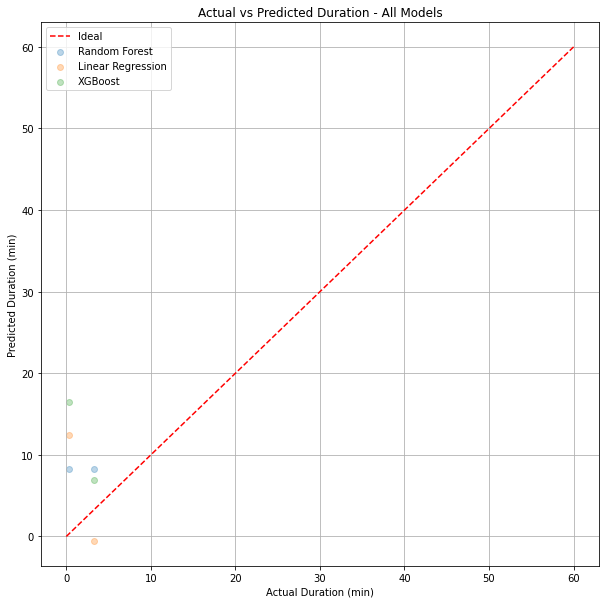

In [43]:
plt.figure(figsize=(10, 10))
plt.plot([0, 60], [0, 60], 'r--', label='Ideal')

plt.scatter(y_test, y_pred, alpha=0.3, label='Random Forest')
plt.scatter(y_test, y_pred_lr, alpha=0.3, label='Linear Regression')
plt.scatter(y_test, y_pred_xgb, alpha=0.3, label='XGBoost')

plt.xlabel('Actual Duration (min)')
plt.ylabel('Predicted Duration (min)')
plt.title('Actual vs Predicted Duration - All Models')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train, y_train)
print("Best Parameters:", search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/home/codespace/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/codespace/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/codespace/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/home/codespace/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.6}


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [3, 5, 10]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
print("Best RF Parameters:", grid.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best RF Parameters: {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 200}


In [46]:
# Retrain RF with best parameters
best_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = best_rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Tuned Random Forest RMSE: {rmse_rf:.2f} minutes")
print(f"Tuned Random Forest MAE: {mae_rf:.2f} minutes")

Tuned Random Forest RMSE: 6.68 minutes
Tuned Random Forest MAE: 6.51 minutes


In [47]:
# Save model and DictVectorizer
with open('random_forest_model.pkl', 'wb') as f_out:
    pickle.dump((dv, rf), f_out)